## Homework 2: Submission
### Name: Ximena Calderon Arevalo
#### Date: February 24, 2021

### Problem 2.1

In [42]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [33]:
data1 = pd.read_csv("../../AS_171_205_2021-Course/data/covid-19-us.csv")

In [34]:
data1

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
379,2021-02-03,26595540,450689
380,2021-02-04,26722382,455805
381,2021-02-05,26851974,459425
382,2021-02-06,26957001,462037


In [35]:
#for i in data1.iloc():
    #        data1['daily cases'][i] = data1['cases'][i] - data1['cases'][i-1]

data1['daily cases'] = (data1['cases'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
data1

,date,cases,deaths,daily cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
...,...,...,...,...
379,2021-02-03,26595540,450689,119014.0
380,2021-02-04,26722382,455805,126842.0
381,2021-02-05,26851974,459425,129592.0
382,2021-02-06,26957001,462037,105027.0


In [53]:
#converted_dates = matplotlib.dates.date2num(data1.date)
weekday1 = matplotlib.dates.num2date(converted_dates)

In [54]:
datetime.datetime.weekday1().weekday()

AttributeError: type object 'datetime.datetime' has no attribute 'weekday1'

Text(0.5, 1.0, 'No. of Daily COVID-19 cases in the US over time')

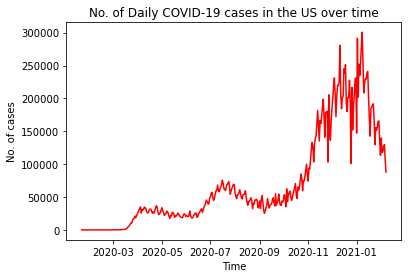

In [6]:
plt.plot_date(converted_dates, data1['daily cases'],'r') #note the function plot_date()
plt.xlabel('Time')
plt.ylabel('No. of cases')
plt.title('No. of Daily COVID-19 cases in the US over time')

how do we look at the weeks here?

In [7]:
data1['date'] = pd.to_datetime(data1['date'])
data1['date'] = data1['date'].apply( lambda data1: datetime.datetime(year=data1.year, month=data1.month, day=data1.day))

data1['date']

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
379   2021-02-03
380   2021-02-04
381   2021-02-05
382   2021-02-06
383   2021-02-07
Name: date, Length: 384, dtype: datetime64[ns]

In [8]:
data1 = data1.set_index('date')
data1.head(10)

,cases,deaths,daily cases
date,,,
2020-01-21,1,0,1.0
2020-01-22,1,0,0.0
2020-01-23,1,0,0.0
2020-01-24,2,0,1.0
2020-01-25,3,0,1.0
2020-01-26,5,0,2.0
2020-01-27,5,0,0.0
2020-01-28,5,0,0.0
2020-01-29,5,0,0.0


In [9]:
df_weekly_avg = data1['daily cases'].resample('7D').mean()


Text(0.5, 1.0, 'No. of Weekly Avg COVID-19 cases in the US over time')

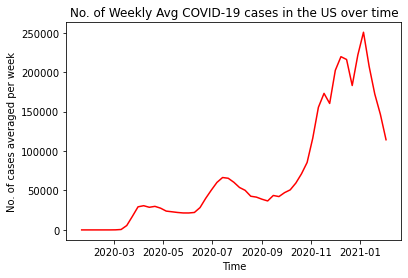

In [10]:

plt.plot_date(df_weekly_avg.index, df_weekly_avg,'r') #note the function plot_date()
plt.xlabel('Time')
plt.ylabel('No. of cases averaged per week')
plt.title('No. of Weekly Avg COVID-19 cases in the US over time')

find max growt rate

### Problem 2.2

In [11]:
a= pd.read_csv("../../AS_171_205_2021-Course/data/a100.csv")
b= pd.read_csv("../../AS_171_205_2021-Course/data/b100.csv")
c= pd.read_csv("../../AS_171_205_2021-Course/data/c100.csv")
d= pd.read_csv("../../AS_171_205_2021-Course/data/d100.csv")

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import f,poisson, binom

#### Data from a100.csv

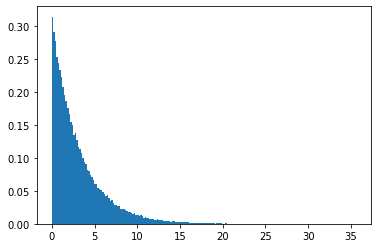

In [13]:
plt.figure()
plt.hist(a, bins=200,density=True);
plt.suptitle('Data From a100.csv', fontsize=14, fontweight='bold')

plt.set_xlabel('bins')
plt.set_ylabel('density')


Looks like a negative exponential.

Text(0.5, 0.98, 'Data From a100.csv + exponential line')

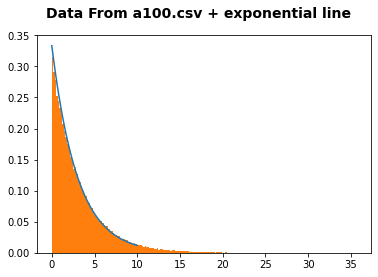

In [116]:
x = np.linspace(0,10)
y = np.exp(-x/3)
#factors to divide x by testes: 3,4,10,2
plt.plot(x, y/3, label='negative exponential distribution with gamma=1/3')
#max of exp was at 1 and needed to be brought down
plt.hist(a, bins=200,density=True);
plt.suptitle('Data From a100.csv + exponential line', fontsize=14, fontweight='bold')


#parameter=-3


#### Data from b100.csv

Text(0.5, 0.98, 'Data From b100.csv ')

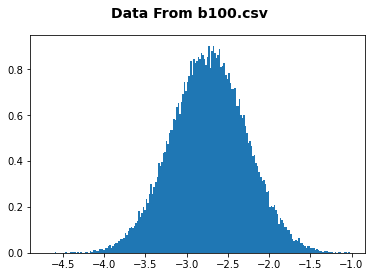

In [117]:
plt.figure()
plt.hist(b, bins=200,density=True);
#looks like a normal distribution centered at ~-2.5
plt.suptitle('Data From b100.csv ', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Data From b100.csv + gaussian distribution')

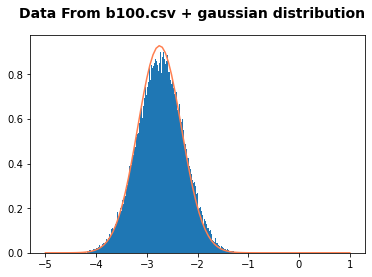

In [118]:
plt.figure()
plt.hist(b, bins=200,density=True);


x_min = -5
x_max = 1

mean = -2.75
std = 0.43
#I centered it where I saw the middle was, in a normal distribution the middle is the mean.
#adjusted stdv until te curve was narrow enoughh, was really close at 0.4 but could ave been better
x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='coral')
#add label
plt.suptitle('Data From b100.csv + gaussian distribution', fontsize=14, fontweight='bold')

#### Data from c100.csv

Text(0.5, 0.98, 'Data From c100.csv ')

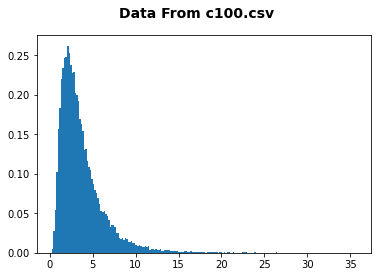

In [119]:
plt.figure()
plt.hist(c, bins=200,density = True);
plt.suptitle('Data From c100.csv ', fontsize=14, fontweight='bold')

This looks like a log normal or gamma distribution, could also be f distribution. The code for f distribution looked easier so I started with testing that one.

Text(0.5, 0.98, 'Data From c100.csv + f distribution')

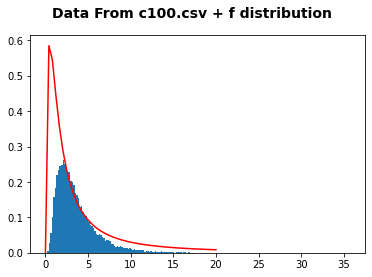

In [120]:
dfn, dfd = 4, 2
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

x = np.linspace(0,10)

plt.plot(2*x,f.pdf(x, dfn, dfd),
       'r-', label='f pdf')
plt.hist(c, bins=200,density = True);
plt.suptitle('Data From c100.csv + f distribution', fontsize=14, fontweight='bold')

F distribution doesn't relly fit even after a lot of adjustment

#### Data from d100.csv

Text(0.5, 0.98, 'Data From d100.csv')

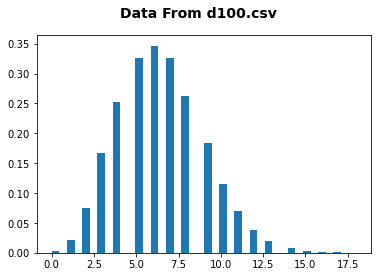

In [121]:
plt.figure()
plt.hist(d, bins=40,density=True);
plt.suptitle('Data From d100.csv', fontsize=14, fontweight='bold')

D looks like a discrete distibutin because of how choppy it looks-not as smooth as continous distributions. Likely a poisson distribution.

Text(0.5, 0.98, 'Data From d100.csv + poisson distribution')

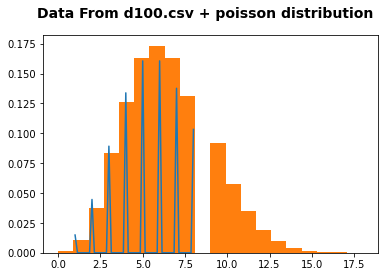

In [129]:
mu = 6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.linspace(1,8)
plt.plot(x, poisson.pmf(x, mu), label='poisson pmf')
plt.hist(d, bins=20,density = True);
plt.suptitle('Data From d100.csv + poisson distribution', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Data From d100.csv + binomial distribution')

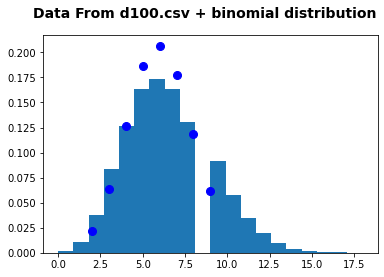

In [123]:
n, p = 15, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.hist(d, bins=20,density = True);
plt.suptitle('Data From d100.csv + binomial distribution', fontsize=14, fontweight='bold')

Neither of these look very pretty but either is a decent fit. Mean of Binomial is np so mean=6 and variance= np(1-p)=3.6

### Problem 2.2b

Creating the dataframes of the series for k=5

In [93]:
sum5  = pd.DataFrame({'every 5 days' : []})

In [94]:
sum5 =sum5.reset_index()

,index,every 5 days


In [95]:
for i in range(0, len(a), 5):
    sum5 = sum5.append({'every 5 days': a[i:i+5].sum(axis = 0)[0]},ignore_index=True)

In [98]:
sum5.head(10)

,every 5 days
0,23.84170
1,9.84391
2,21.37130
3,21.90570
4,19.74688
5,17.90948
6,16.94611
7,19.61623
8,11.55782
9,22.58678


Text(0.5, 0.98, 'a data when K=5 as density')

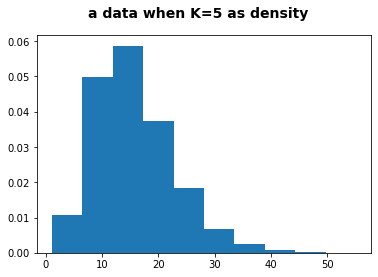

In [111]:
plt.hist(sum5,density=True)
plt.suptitle('a data when K=5 as density', fontsize=14, fontweight='bold')

#plt.set_xlabel('x')
#ax.set_ylabel('y')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

In [105]:
sum5b = pd.DataFrame({'every 5 days' : []}).reset_index()
for i in range(0, len(b), 5):
    sum5b = sum5b.append({'every 5 days': b[i:i+5].sum(axis = 0)[0]},ignore_index=True)


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0.98, 'Data From b wen k=5')

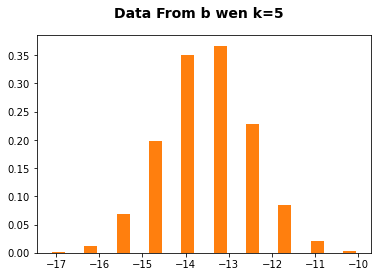

In [124]:
plt.hist(sum5b,density=True)
plt.suptitle('Data From b when k=5', fontsize=14, fontweight='bold')

In [107]:
sum5c = pd.DataFrame({'every 5 days' : []}).reset_index()
for i in range(0, len(c), 5):
    sum5c = sum5c.append({'every 5 days': c[i:i+5].sum(axis = 0)[0]},ignore_index=True)

(array([[       nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan],
        [0.01222572, 0.05947431, 0.07541214, 0.04184183, 0.01823771,
         0.0073435 , 0.00221919, 0.00096837, 0.00020174, 0.00012105]]),
 array([ 6.27583 , 10.862027, 15.448224, 20.034421, 24.620618, 29.206815,
        33.793012, 38.379209, 42.965406, 47.551603, 52.1378  ]),
 <a list of 2 BarContainer objects>)

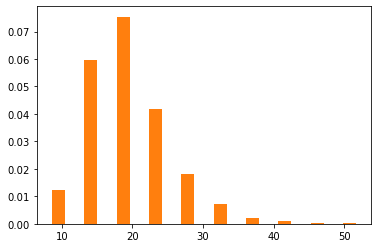

In [108]:
plt.hist(sum5c,density=True)
plt.suptitle('Data From c when k=5', fontsize=14, fontweight='bold')

In [109]:
sum5d = pd.DataFrame({'every 5 days' : []}).reset_index()
for i in range(0, len(d), 5):
    sum5d = sum5d.append({'every 5 days': d[i:i+5].sum(axis = 0)[0]},ignore_index=True)

Text(0.5, 0.98, 'Data From d when k=5')

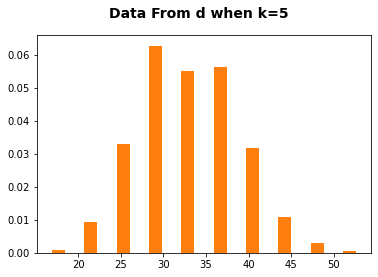

In [125]:
plt.hist(sum5d,density=True)
plt.suptitle('Data From d when k=5', fontsize=14, fontweight='bold')

##### K = 20

In [ ]:
sum20a = pd.DataFrame({'every 20 days' : []}).reset_index()
for i in range(0, len(a), 20):
    sum20a = sum20a.append({'every 20 days': a[i:i+20].sum(axis = 0)[0]},ignore_index=True)



In [ ]:
plt.hist(sum20a,density=True)
plt.suptitle('Data From d when k=20', fontsize=14, fontweight='bold')

In [ ]:
sum20b = pd.DataFrame({'every 20 days' : []}).reset_index()
for i in range(0, len(b), 20):
    sum20b = sum20b.append({'every 20 days': b[i:i+20].sum(axis = 0)[0]},ignore_index=True)


In [ ]:
plt.hist(sum20b,density=True)
plt.suptitle('Data From b when k=20', fontsize=14, fontweight='bold')

In [ ]:
sum20c = pd.DataFrame({'every 20 days' : []}).reset_index()
for i in range(0, len(c), 20):
    sum20c = sum20c.append({'every 20 days': c[i:i+20].sum(axis = 0)[0]},ignore_index=True)


In [ ]:
plt.hist(sum20c,density=True)
plt.suptitle('Data From c when k=20', fontsize=14, fontweight='bold')

In [ ]:
sum20d = pd.DataFrame({'every 20 days' : []}).reset_index()
for i in range(0, len(d), 20):
    sum20d = sum20d.append({'every 20 days': d[i:i+20].sum(axis = 0)[0]},ignore_index=True)

In [ ]:
    plt.hist(sum20d,density=True)
plt.suptitle('Data From d when k=20', fontsize=14, fontweight='bold')

##### K=80

In [ ]:
sum80a = pd.DataFrame({'every 80 days' : []}).reset_index()
for i in range(0, len(a), 80):
    sum80a = sum80a.append({'every 80 days': a[i:i+80].sum(axis = 0)[0]},ignore_index=True)
plt.hist(sum80a,density=True)
plt.suptitle('Data From a when k=80', fontsize=14, fontweight='bold')

In [ ]:
sum80b = pd.DataFrame({'every 80 days' : []}).reset_index()
for i in range(0, len(b), 80):
    sum80b = sum80b.append({'every 80 days': b[i:i+80].sum(axis = 0)[0]},ignore_index=True)
plt.hist(sum80b,density=True)
plt.suptitle('Data From b when k=80', fontsize=14, fontweight='bold')

In [ ]:
sum80c = pd.DataFrame({'every 80 days' : []}).reset_index()
for i in range(0, len(c), 80):
    sum80c = sum80c.append({'every 80 days': c[i:i+80].sum(axis = 0)[0]},ignore_index=True)
plt.hist(sum80c,density=True)
plt.suptitle('Data From c when k=80', fontsize=14, fontweight='bold')

In [ ]:
sum80d = pd.DataFrame({'every 80 days' : []}).reset_index()
for i in range(0, len(d), 80):
    sum80d = sum80d.append({'every 80 days': d[i:i+80].sum(axis = 0)[0]},ignore_index=True)
plt.hist(sum80d,density=True)
plt.suptitle('Data From d when k=80', fontsize=14, fontweight='bold')

#### Mean and Variance for original data

1. for a100.csv, exponential with parameter=-1/3 so mean=-3 and variance= 9

2. for b100.csv, mean= -2.75, variance= 0.185

3. For c100.csv, mean= 2

4. For d100.csv, Binomial distribution as mean = 6 and variance= 3.6